In [152]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [153]:
# Load the required libraries
import numpy as np
import pandas as pd

In [154]:
# Load the car price data file 
carprice= pd.read_csv("CarPrice_Assignment.csv",skipinitialspace=True)

In [155]:
# Inspect the data
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [156]:
carprice.shape

(205, 26)

In [157]:
carprice.info()
#there is no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [158]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [159]:
# getting the car company name and car model name
carprice['carcompany']=carprice.CarName.str.split(' ',expand=True)[0]
carprice['carmodel']=carprice.CarName.str.split(' ',expand=True)[1]

In [112]:
#data cleaning 4wd to fwd
#carprice['drivewheel']=carprice['drivewheel'].map({'rwd':'rwd','fwd':'fwd','4wd':'fwd'})

In [160]:
#DATA CLEANING
#car_id can be dropped as it will not make impact on price. car_id is specfic to cars only
carprice.drop('car_ID',axis=1,inplace=True)

In [161]:
#dropping car name and car model since i fetched out a derived variable car company which will be used furturs
carprice.drop(['CarName','carmodel'], axis = 1, inplace = True)

In [162]:
#visulising pattern
import matplotlib.pyplot as plt
import seaborn as sns

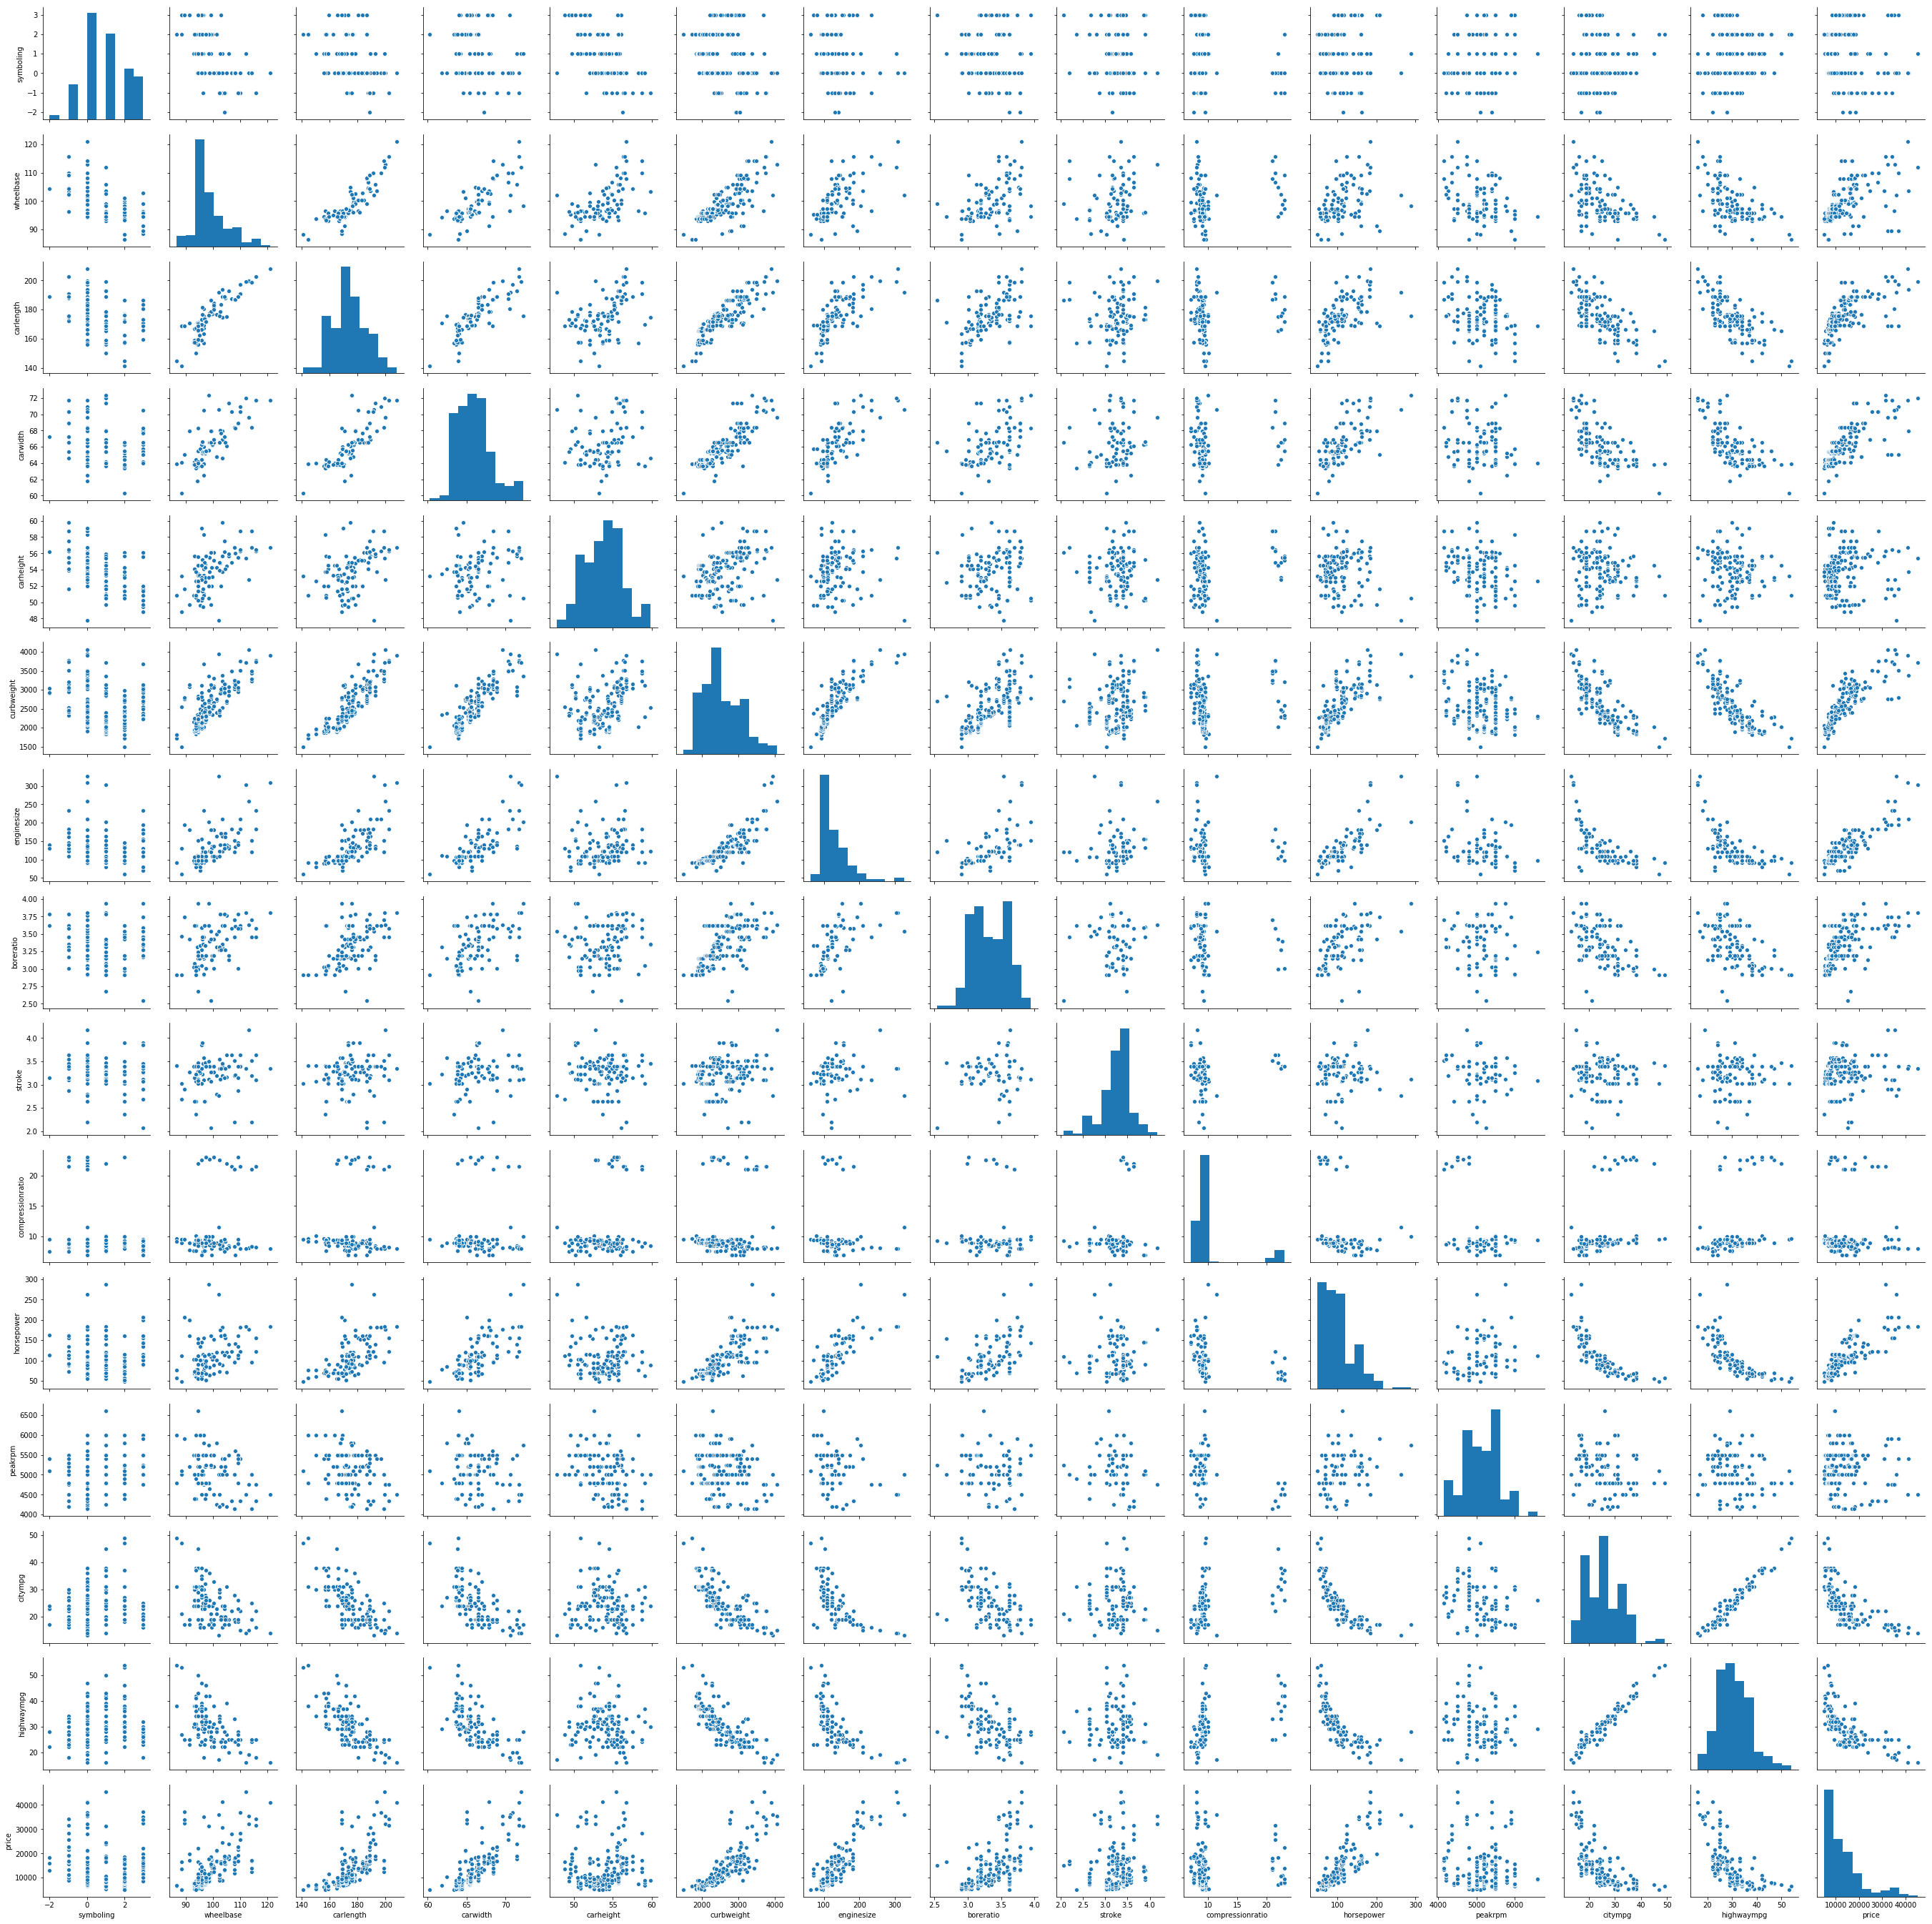

In [119]:
#getting the pattern in numerical variables
sns.pairplot(carprice)
plt.show();

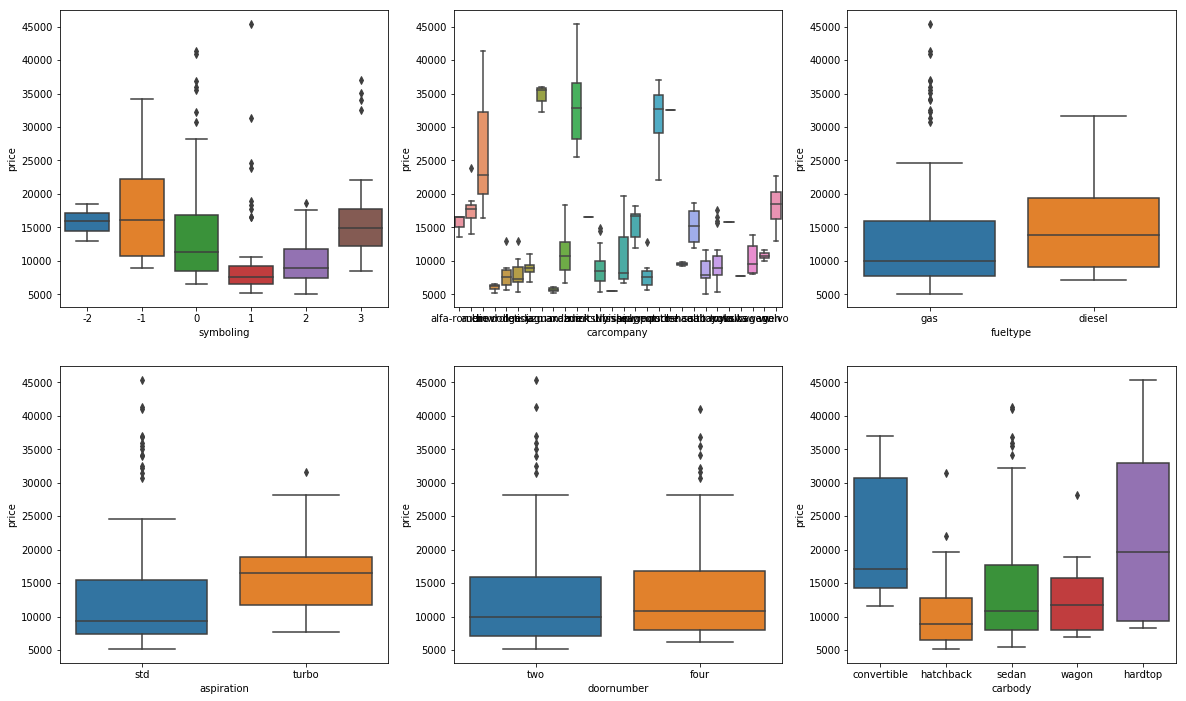

In [164]:
#getting the pattern in categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'carcompany', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.show()

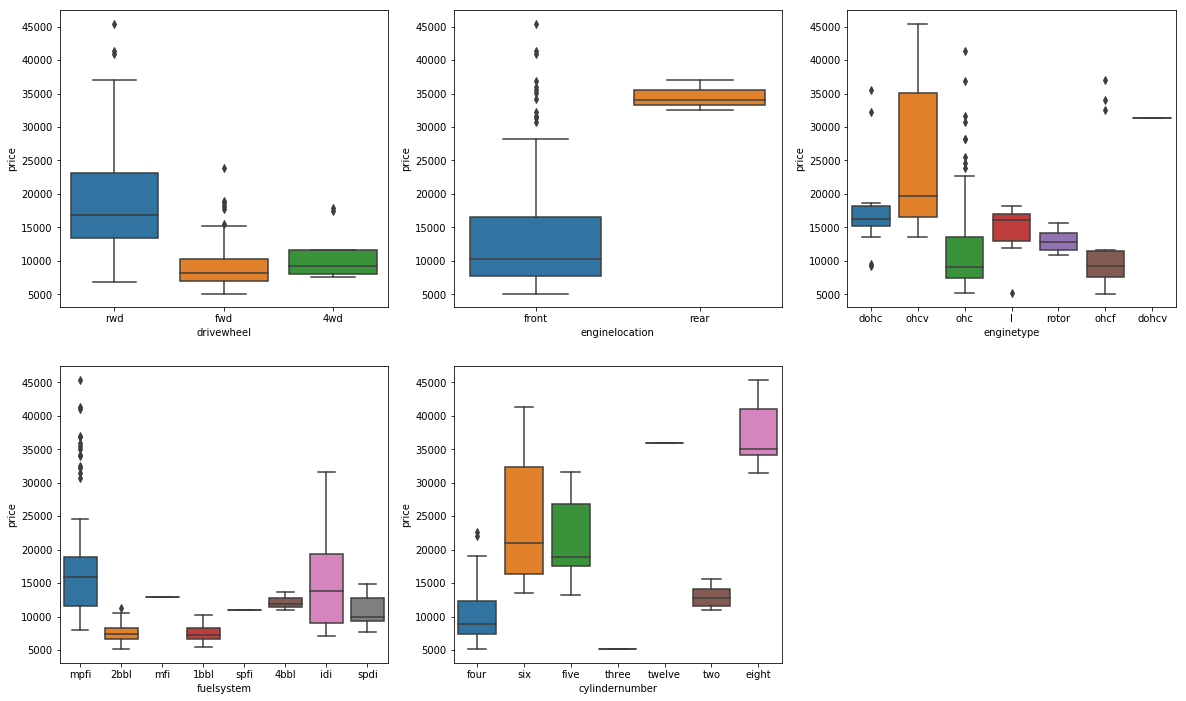

In [165]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.show()

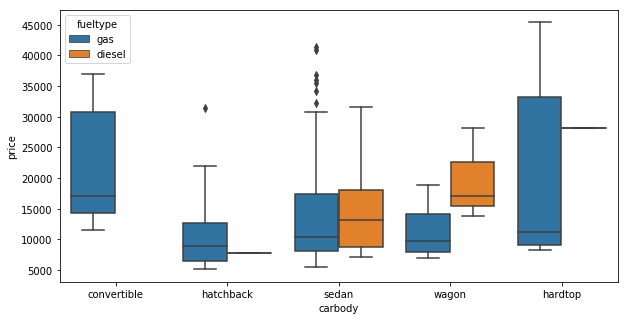

In [122]:
#checking multiple independent variable effects simultaneously
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

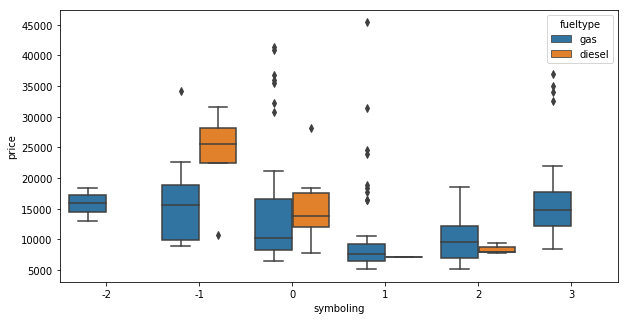

In [166]:
#checking multiple independent variable effects simultaneously
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'symboling', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

In [167]:
#data preparation
carprice['fueltype']=carprice['fueltype'].map({'diesel':0,'gas':1})
carprice['aspiration']=carprice['aspiration'].map({'std':0,'turbo':1})
carprice['doornumber']=carprice['doornumber'].map({'two':0,'four':1})
carprice['enginelocation']=carprice['enginelocation'].map({'front':0,'rear':1})

In [168]:
carprice[['fueltype','aspiration','doornumber','enginelocation']].head()

,fueltype,aspiration,doornumber,enginelocation
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,1,0
4,1,0,1,0


In [169]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg        

In [170]:
#creation of dummy variables
# Let's drop the first column from status df using 'drop_first = True'

carbody = pd.get_dummies(carprice['carbody'], drop_first = True)
carprice = pd.concat([carprice, carbody], axis = 1)
carprice.drop(['carbody'], axis = 1, inplace = True)

In [171]:
symbol = pd.get_dummies(carprice['symboling'], drop_first = True)
carprice = pd.concat([carprice, symbol], axis = 1)
carprice.drop(['symboling'], axis = 1, inplace = True)

In [172]:
drivewheel = pd.get_dummies(carprice['drivewheel'], drop_first = True)
carprice = pd.concat([carprice, drivewheel], axis = 1)
carprice.drop(['drivewheel'], axis = 1, inplace = True)

In [173]:
enginetype = pd.get_dummies(carprice['enginetype'], drop_first = True)
carprice = pd.concat([carprice, enginetype], axis = 1)
carprice.drop(['enginetype'], axis = 1, inplace = True)

In [174]:
fuelsystem = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
carprice = pd.concat([carprice, fuelsystem], axis = 1)
carprice.drop(['fuelsystem'], axis = 1, inplace = True)

In [175]:
cylindernumber = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
carprice = pd.concat([carprice, cylindernumber], axis = 1)
carprice.drop(['cylindernumber'], axis = 1, inplace = True)

In [176]:
carcompany = pd.get_dummies(carprice['carcompany'], drop_first = True)
carcompany = pd.concat([carprice, carcompany], axis = 1)
carprice.drop(['carcompany'], axis = 1, inplace = True)

In [177]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
-1                  2

In [178]:
#Divinding the data 
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [179]:
#SCALING THE DATA
from sklearn.preprocessing import MinMaxScaler

In [180]:
scaler = MinMaxScaler()

In [181]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','boreratio','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [182]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
122,1,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,98,...,0,0,0,0,0,1,0,0,0,0
125,1,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,151,...,0,1,0,0,0,1,0,0,0,0
166,1,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,98,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,130,...,0,1,0,0,0,1,0,0,0,0
199,1,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,130,...,0,1,0,0,0,1,0,0,0,0


In [183]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,124.958042,...,0.0,0.440559,0.041958,0.0,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,40.974034,...,0.0,0.498199,0.201198,0.0,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,97.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,110.000000,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,141.000000,...,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,326.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


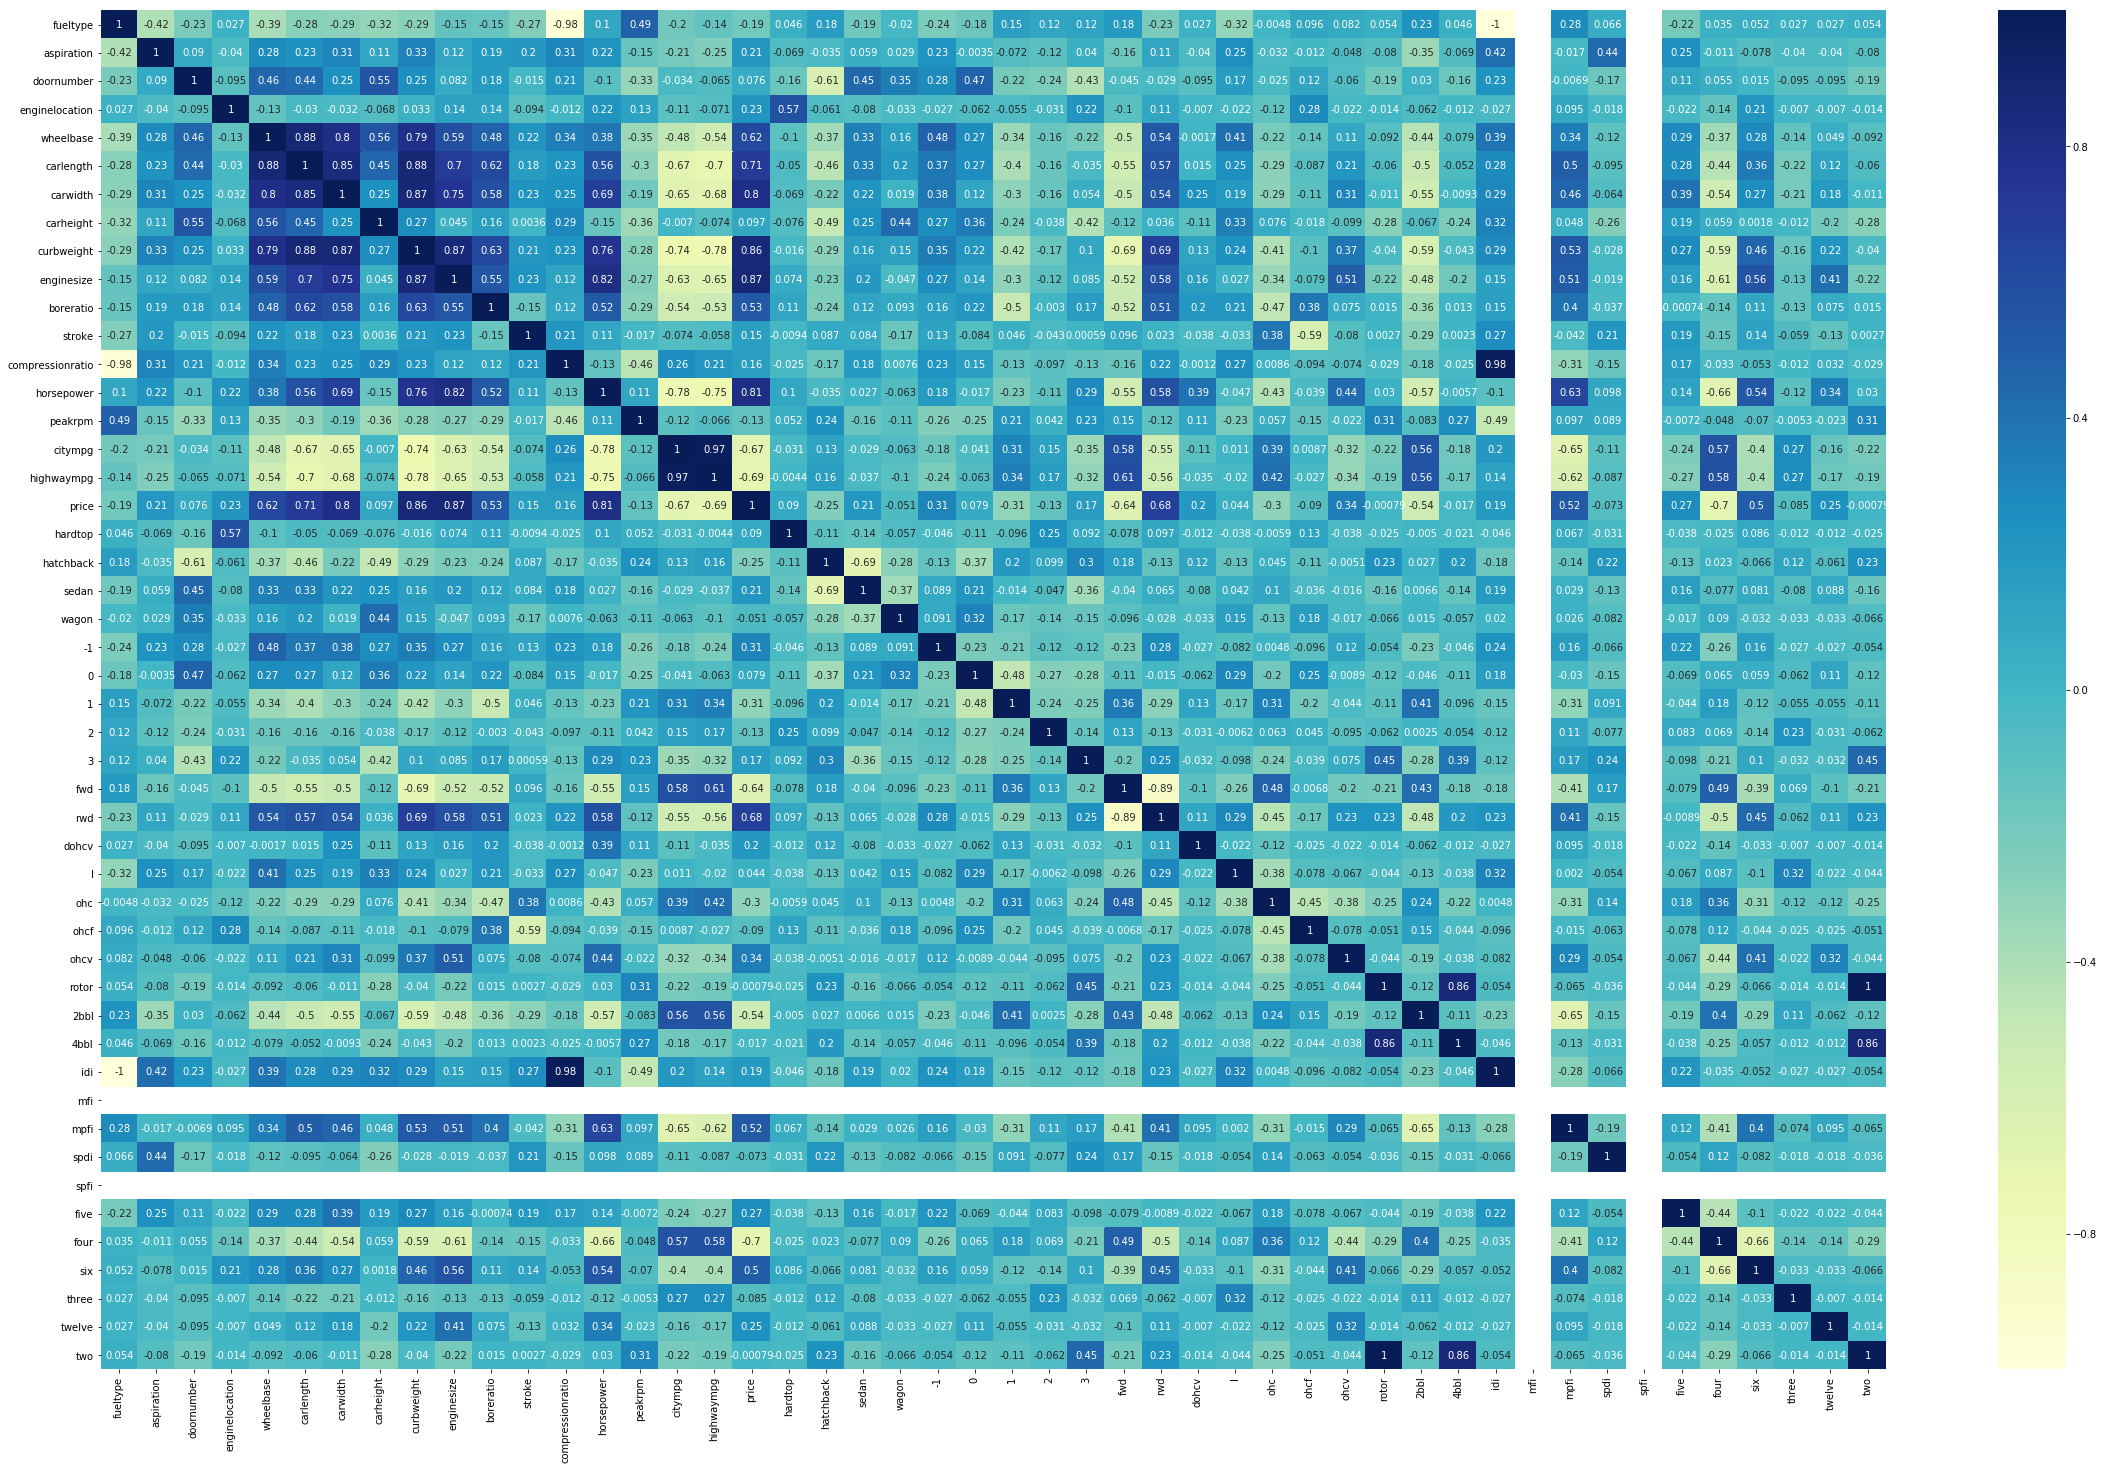

In [184]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

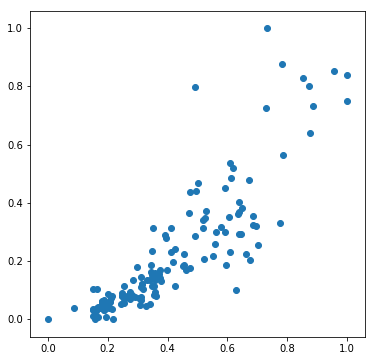

In [185]:
#DOING THE MANUAL ANALYSIS
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

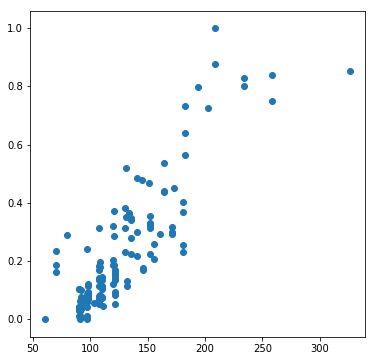

In [186]:
#DOING THE MANUAL ANALYSIS
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [187]:
#DIVIDNG TRAINING SET INTO PREDICATABLE VARIABLES AND TARGET VARIABALES
y_train = df_train.pop('price')
X_train = df_train

In [188]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [189]:
lr.params

const        -0.139568
curbweight    0.879863
dtype: float64

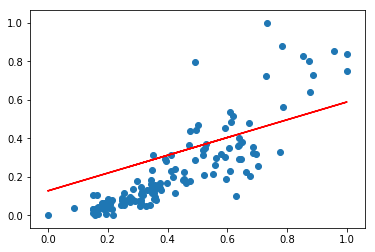

In [190]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [191]:
#Addind all the variable to the model
# check all the columns
carprice.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',                 -1,                  0,
                        1,                  2,                  3,
                    'fwd',              'rwd',            'dohcv',
                      'l',              'ohc',             'ohcf',
                   'ohcv',            'rotor',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',             'spfi',
                   'five',             'four',              's

In [192]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              -2.103826e-01
fueltype           -7.101612e-02
aspiration          4.909103e-02
doornumber         -3.058023e-03
enginelocation      2.308706e-01
wheelbase           1.128482e-01
carlength          -4.652425e-02
carwidth            2.275874e-01
carheight           4.076517e-02
curbweight          1.079241e-01
enginesize          5.571079e-03
boreratio          -2.429653e-01
stroke             -2.076627e-01
compressionratio    1.482875e-01
horsepower          3.878106e-01
peakrpm             1.056258e-01
citympg            -3.228994e-02
highwaympg          1.128348e-01
hardtop            -1.844288e-01
hatchback          -1.406689e-01
sedan              -1.266200e-01
wagon              -1.380685e-01
-1                  1.304886e-01
0                   1.681409e-01
1                   1.759689e-01
2                   1.749152e-01
3                   1.243051e-01
fwd                -1.954821e-02
rwd                 3.066089e-02
dohcv              -1.596816e-01
l         

In [193]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     46.67
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.79e-49
Time:                        13:16:09   Log-Likelihood:                 235.55
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                      99   BIC:                            -252.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2104      0.180  

In [194]:
#checking VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
46,two,inf
33,rotor,inf
0,fueltype,1688.530000
36,idi,555.770000
12,compressionratio,210.660000
9,enginesize,121.640000
42,four,112.380000
16,highwaympg,46.570000
15,citympg,45.380000
8,curbweight,45.200000


In [196]:
#drop featurs which has infinity and nan vif
col_list=['rotor','dohcv','ohc','l','ohcf','ohcv','dohcv','mfi','spfi']
X = X_train.drop(col_list, 1)

In [197]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [198]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     26.43
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.48e-38
Time:                        13:16:34   Log-Likelihood:                 186.14
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     104   BIC:                            -178.7
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3984      0.198  

In [199]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,970.62
30,idi,377.91
12,compressionratio,151.04
34,four,76.32
9,enginesize,75.41
8,curbweight,41.92
15,citympg,39.16
16,highwaympg,38.36
19,sedan,27.37
23,1,24.91


In [200]:
# Build a third fitted model by dropping fuel type
X = X_train.drop('fueltype', 1,)
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     46.67
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.79e-49
Time:                        13:16:46   Log-Likelihood:                 235.55
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                      99   BIC:                            -252.7
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2814      0.202  

In [201]:
# Calculate the VIFs again for the third model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
45,two,inf
32,rotor,inf
8,enginesize,956.060000
10,stroke,818.020000
41,four,300.790000
11,compressionratio,298.600000
15,highwaympg,232.190000
7,curbweight,212.600000
35,idi,204.810000
14,citympg,198.420000


In [202]:
#lets use RFE Since varibles are greater than 20

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [203]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [204]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 23),
 ('aspiration', False, 33),
 ('doornumber', False, 35),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 29),
 ('curbweight', True, 1),
 ('enginesize', False, 34),
 ('boreratio', False, 5),
 ('stroke', False, 15),
 ('compressionratio', False, 24),
 ('horsepower', True, 1),
 ('peakrpm', False, 25),
 ('citympg', False, 2),
 ('highwaympg', False, 21),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 (-1, False, 12),
 (0, False, 10),
 (1, False, 9),
 (2, False, 8),
 (3, False, 11),
 ('fwd', False, 32),
 ('rwd', False, 19),
 ('dohcv', False, 4),
 ('l', False, 17),
 ('ohc', False, 6),
 ('ohcf', False, 28),
 ('ohcv', False, 16),
 ('rotor', False, 18),
 ('2bbl', False, 36),
 ('4bbl', False, 30),
 ('idi', False, 22),
 ('mfi', False, 37),
 ('mpfi', False, 31),
 ('spdi', False, 27),
 ('spfi', False, 38),
 ('five', False, 7),
 ('four', False, 3),
 ('six',

In [205]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [206]:
X_train.columns[~rfe.support_]

Index([        'fueltype',       'aspiration',       'doornumber',
              'carheight',       'enginesize',        'boreratio',
                 'stroke', 'compressionratio',          'peakrpm',
                'citympg',       'highwaympg',                 -1,
                        0,                  1,                  2,
                        3,              'fwd',              'rwd',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   '2bbl',             '4bbl',              'idi',
                    'mfi',             'mpfi',             'spdi',
                   'spfi',             'five',             'four',
                    'six',            'three',           'twelve',
                    'two'],
      dtype='object')

In [207]:
#Building model using statsmodel, for the detailed statistics
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [208]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [209]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [210]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     77.91
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           2.10e-50
Time:                        13:17:23   Log-Likelihood:                 155.07
No. Observations:                 143   AIC:                            -288.1
Df Residuals:                     132   BIC:                            -255.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0035      0.052     -0.

In [211]:
#we have seen in manual analysis that car length is insignificant, so we can drop and test again the new model
X_train_new = X_train_rfe.drop(["carlength"], axis = 1)

In [212]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [213]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [214]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     82.78
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           4.10e-50
Time:                        13:17:34   Log-Likelihood:                 151.89
No. Observations:                 143   AIC:                            -283.8
Df Residuals:                     133   BIC:                            -254.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0323      0.052     -0.

In [215]:
X_train_new.columns

Index(['const', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight',
       'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [216]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [217]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,46.45
2,carwidth,39.14
1,wheelbase,28.06
4,horsepower,12.39
7,sedan,5.14
6,hatchback,2.82
8,wagon,2.06
0,enginelocation,1.64
5,hardtop,1.59


In [218]:
#it seems curbweight is also not good precditable variable, lets remove that and build new model

X_train_final = X_train_rfe.drop(["curbweight"], axis = 1)

In [219]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_final)

In [220]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [221]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     73.95
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           2.12e-47
Time:                        13:17:59   Log-Likelihood:                 145.11
No. Observations:                 143   AIC:                            -270.2
Df Residuals:                     133   BIC:                            -240.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0462      0.054      0.

In [222]:
X_train_final= X_train_final.drop(['const'], axis=1)

In [223]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,56.36
3,carwidth,41.48
1,wheelbase,26.72
4,horsepower,7.57
7,sedan,6.10
8,wagon,2.71
6,hatchback,2.69
0,enginelocation,1.64
5,hardtop,1.63


In [224]:
#Residual Analysis of the train data
y_train_price = lm.predict(X_train_lm)

In [225]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

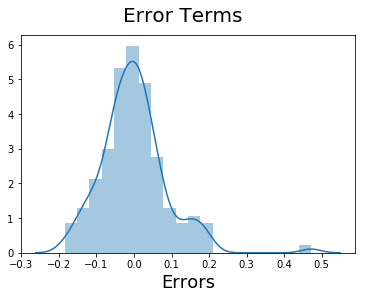

In [226]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [227]:
#Making predictions
#Applying the scaling on the test sets
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','boreratio','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [228]:
#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [229]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [230]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

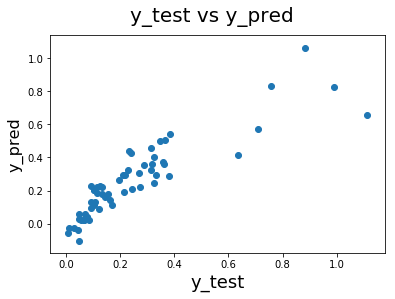

In [231]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [232]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7842631272947043

In [ ]:
#with above r2 output, we know that we cover almost 78.4% of data